### R+J

Enter your guy type:
troll
Enter your gal type:
troll
How long do you want to watch them interact?
(Please enter a number greater or equal to zero)
10
What is the guy's first impression of the gal?
Enter a positive number for liking and negative number for disliking.
1
What is the gal's first impression of the guy?
Enter a positive number for liking and negative number for disliking.
1


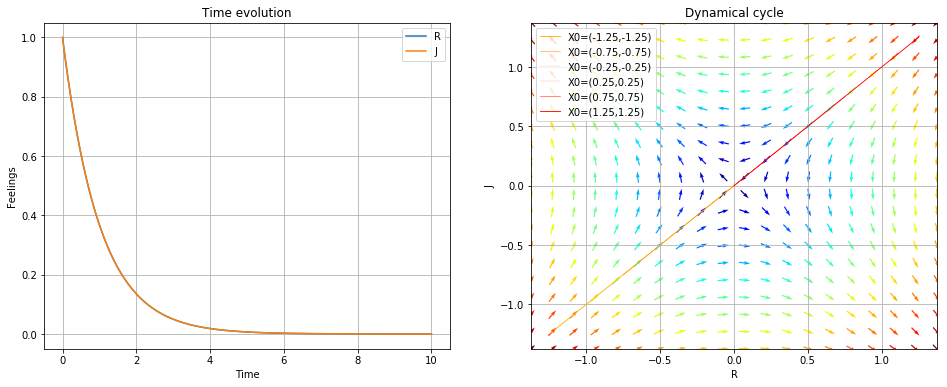

In [19]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
import sys

# Parameters
# a = 0.
# b = 1.
# c = -1.
# d = -1.
type_dict = {'ice man': (0,0),
            'agreeable conformer': (0,1),
            'troll': (0,-1),
            'egomeister': (1,0),
            'desperate rabbit': (1,1),
            'cold-ass seeker': (1,-1),
            'absurd egomeister': (-1,0),
            'self-doubting lover': (-1,1),
            'suicide boi': (-1,-1)}
guy_type = input("Enter your guy type:\n").lower()
gal_type = input("Enter your gal type:\n").lower()              
try:
    a = type_dict[guy_type][0]
    b = type_dict[guy_type][1]
    c = type_dict[gal_type][0]
    d = type_dict[gal_type][1]
except ValueError:
    print('We aint got this kind of guy or gal, try again.')
    sys.exit()
    
# t = linspace(0, 5, 50000) # time
# X0 = array([1, 1]) # initials conditions of who likes or dislikes who                 
duration = int(input("How long do you want to watch them interact?\n(Please enter a number greater or equal to zero)\n"))
try:
    itr = duration*1000
    t = np.linspace(0, duration, itr)
except ValueError:
    if duration < 0:
        sys.exit('a time duration cannot be negative!')
    print('Time error')
    sys.exit()
    
guy_0 = float(input("What is the guy's first impression of the gal?\n\
Enter a positive number for liking and negative number for disliking.\n"))
gal_0 = float(input("What is the gal's first impression of the guy?\n\
Enter a positive number for liking and negative number for disliking.\n"))
try:
    X0 = np.array([guy_0, gal_0])
except:
    print("their initial feelings are screwed up, system cannot process")
    sys.exit()

def dX_dt(X, t=0):
    """
    X: an array with 2 rows of values
    X[0]: R(t)
    X[1]: J(t)
    """
    return np.array([a*X[0] + b*X[1], c*X[1] + d*X[0]])

X_f0 = np.array([0, 0]) #fix point 1
X_f1 = np.array([5, 5]) #fix point 2

X = integrate.odeint(dX_dt, X0, t)
R, J = X.T

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
ax = axs[0]
ax.plot(t,R,label='R')
ax.plot(t,J,label='J')
ax.set_title('Time evolution')
ax.set_xlabel('Time')
ax.set_ylabel('Feelings')
ax.legend()
ax.grid(True)

# f1 = p.figure()
# p.figure(figsize=(12,10))
# p.plot(t, R, 'r-', label='R')
# p.plot(t, J, 'b-', label='J')
# p.legend(loc='best')
# p.xlabel('Time')
# p.ylabel('Feelings')
# p.title('Evolution of R+J dynamics')
# p.grid(True)
# p.show()

values  = np.linspace(-.25, .25, 6) # range of initial conditions for trajectories
vcolors = plt.cm.autumn_r(np.linspace(0.3, 1., len(values))) # colors for each trajectory

#f2 = p.figure()
ax = axs[1]

#-------------------------------------------------------
# plot trajectories
#p.figure(figsize=(12,10))
for v, col in zip(values, vcolors):
    X0 = v*X_f1                               # starting point
    X = integrate.odeint(dX_dt, X0, t)         # we don't need infodict here
    ax.plot(X[:,0], X[:,1],
           lw=3.5*v, color=col,
           label='X0=(%.2f,%.2f)'%(X0[0],X0[1]))

#-------------------------------------------------------
# define a grid and compute direction at each point
ymax = plt.ylim(ymin=0)[1]                        # set axis min and get axis max
xmax = plt.xlim(xmin=0)[1]
nb_points   = 20

x = np.linspace(-xmax, xmax, nb_points)
y = np.linspace(-ymax, ymax, nb_points)

X1 , Y1  = np.meshgrid(x, y)                       # create a grid
DX1, DY1 = dX_dt([X1, Y1])                      # compute growth rate on the gridt
M = (np.hypot(DX1, DY1))                           # Norm of the growth rate        note:hypot is from np.hypot
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX1 /= M                                        # Normalize each arrows
DY1 /= M

#-------------------------------------------------------
# Drow direction fields, using matplotlib 's quiver function
# I choose to plot normalized arrows and to use colors to give information on
# the growth speed
# p.title('Trajectories and direction fields')
# Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)
# p.xlabel('R')
# p.ylabel('J')
# p.legend()
# p.grid(True)
# p.xlim(-xmax, xmax)
# p.ylim(-ymax, ymax)
# p.show()

Q = ax.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=plt.cm.jet)
#ax.plot(x, y)
ax.set_yscale('linear')
ax.set_title('Dynamical cycle')
ax.set_xlabel('R')
ax.set_ylabel('J')
ax.legend()
ax.set_xlim(-xmax, xmax)
ax.set_ylim(-ymax, ymax)
ax.grid(True)

plt.show()

In [ ]:
t

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# para_type = int(input("Enter index for your guy type\n\
#     0: bacteria 1\n\
#     1: bacteria 2\n\
#     2: coral\n\
#     3: fingerprint\n\
#     4: spirals\n\
#     5: spirals dense\n\
#     6: spirals fast\n\
#     7: unstable\n\
#     8: worms 1\n\
#     9: worms 2\n\
#     10: zebrafish\n"))
# # Parameters
# # para = np.zeros((81,4))
# # for i in range([0,1,-1]):
# #     print(i)
# #para = [0, 1, 0, -1] #agreeable conformer meets troll: star crossed romance
# a = 0
# b = 1
# c = 1
# d = -1
# # Initial conditions
# x_0 = .8
# y_0 = .8
# # Initializations
# itr = 50000 # iterations
# dt = 0.0001 # time step
# x = [x_0]
# y = [y_0]
# t = [0]

# def dx_dt(x, y): return a*x + b*y
# def dy_dt(x, y): return c*y + d*x

# # Evolve
# for i in range(itr):
#     t.append(t[i]+dt)
#     x.append(x[i] + dt*dx_dt(x[i], y[i]))
#     y.append(y[i] + dt*dy_dt(x[i], y[i]))

# # Plot
# # plt.figure(figsize=(10,5))
# # plt.plot(x[0:5],y[0:5], marker='o',set_yscale)
# # #plt.plot(x_0,y_0,label='initial',marker='o', markersize=3, color="red")
# # plt.title('Dynamical cycle')
# # plt.xlabel('x')
# # plt.ylabel('y')
# # plt.grid()
# fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# ax = axs[0]
# ax.plot(x, y)
# ax.set_yscale('linear')
# ax.set_title('Dynamical cycle')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.grid(True)

# ax = axs[1]
# ax.plot(t,x,label='x')
# ax.plot(t,y,label='y')
# ax.set_title('Time evolution')
# ax.set_xlabel('Time')
# ax.set_ylabel('x and y')
# ax.legend()
# ax.grid(True)

# # plt.figure(2)
# # plt.figure(figsize=(10,5))
# # plt.plot(t,x,label='x')
# # plt.plot(t,y,label='y')
# # plt.title('Time evolution')
# # plt.xlabel('Time')
# # plt.ylabel('x and y')
# # plt.legend()
# # plt.grid()
# plt.show()